# Throughout the paper, we utilize a 2.5-layer model to build our argument about upper ocean thickness adjustment. Here, we show that the result, of the regional adjustment of the upper ocean, holds even if we utilized a true 3 layer model. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import copy

In [5]:
L_x_h =3795751.714012305        # [m]  Zonal width of domain. #see compute_domainsize.ipynb in 1 degree folder for how we got this
L_y_h = 13785809.584401697        # [m]  Meridional height of domain

nx = 128
ny = 129

L_x =(ny/(ny-1))*L_x_h     # [m]  Zonal width of domain. #see compute_domainsize.ipynb in 1 degree folder for how we got this
L_y = (nx/(nx-1))*L_y_h        # [m]  Meridional height of domain


dx = L_x / nx            # [m]
dy = L_y / ny            # [m]

H1 = 250.0          # [m]  Average depth of the fluid
H2 = 250.0          # [m]  Average depth of the fluid
H3 = 10000.0

nu = 8E3       # [m^2.s^-1] Coefficient of diffusion

#Set coriolis values
omega=7.2921E-5
ref_lat=0
f0=2*omega*np.sin(np.deg2rad(ref_lat))
beta=2*omega*np.cos(np.deg2rad(ref_lat))/(6.637E6)

# Set densities and reduced gravity
rho0 = 1024.0 #reference density of fluid
rho3=1030 #density abyssal fluid
rho2=1028 #density bottom active layer
rho1=1026 #density top active layer

g1= 9.8*(rho2-rho1)/rho1 #reduced gravity 1

# positions of the value points in [m]
ux = (-L_x/2 + np.arange(nx+1)*dx)[:, np.newaxis]
vx = (-L_x/2 + dx/2.0 + np.arange(nx)*dx)[:, np.newaxis]

vy = (-L_y/2 + np.arange(ny+1)*dy)[np.newaxis, :]
uy = (-L_y/2 + dy/2.0 + np.arange(ny)*dy)[np.newaxis, :]

hx = vx
hy = uy


f_v_inv=1/(f0 + beta*vy)



# Abyss size 4000m; long run

In [6]:
# Load in top perturbation
### TOP PERTURB
#TIMEPERIOD1
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years0to10_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h3_xr_top1=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years0to10_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h2_xr_top1=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years0to10_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h1_xr_top1=(h1.to_array()).squeeze()


#TIMEPERIOD2
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years10to42pt5_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h3_xr_top2=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years10to42pt5_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h2_xr_top2=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years10to42pt5_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h1_xr_top2=(h1.to_array()).squeeze()


#TIMEPERIOD3
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years42pt5to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h3_xr_top3=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years42pt5to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h2_xr_top3=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years42pt5to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h1_xr_top3=(h1.to_array()).squeeze()

### BOTTOM PERTURB
#TIMEPERIOD1
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years0to10_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h3_xr_bottom1=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years0to10_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h2_xr_bottom1=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years0to10_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h1_xr_bottom1=(h1.to_array()).squeeze()


#TIMEPERIOD2
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years10to42pt5_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h3_xr_bottom2=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years10to42pt5_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h2_xr_bottom2=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years10to42pt5_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h1_xr_bottom2=(h1.to_array()).squeeze()


#TIMEPERIOD3
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years42pt5to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h3_xr_bottom3=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years42pt5to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h2_xr_bottom3=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years42pt5to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H34000.nc")
h1_xr_bottom3=(h1.to_array()).squeeze()

In [7]:
# Concatenate time periods together
h1_xr_top=xr.concat([h1_xr_top1,h1_xr_top2,h1_xr_top3],dim='time')
h2_xr_top=xr.concat([h2_xr_top1,h2_xr_top2,h2_xr_top3],dim='time')
h3_xr_top=xr.concat([h3_xr_top1,h3_xr_top2,h3_xr_top3],dim='time')

h1_xr_bottom=xr.concat([h1_xr_bottom1,h1_xr_bottom2,h1_xr_bottom3],dim='time')
h2_xr_bottom=xr.concat([h2_xr_bottom1,h2_xr_bottom2,h2_xr_bottom3],dim='time')
h3_xr_bottom=xr.concat([h3_xr_bottom1,h3_xr_bottom2,h3_xr_bottom3],dim='time')

<xarray.DataArray 'time' ()>
array(41.54731707)
Coordinates:
    time      float64 1.496e+04
    variable  <U29 '__xarray_dataarray_variable__'


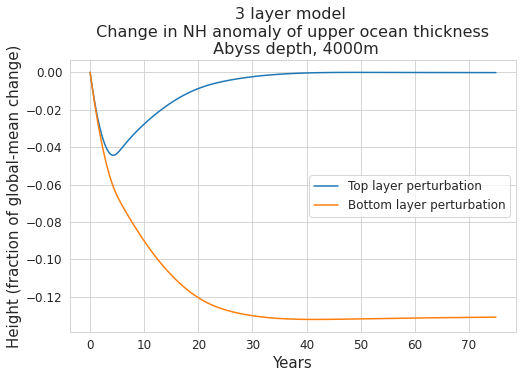

In [8]:
import seaborn as sns
sns.set_style(style="whitegrid") #comment out if don't want seaborn background
plt.rcParams.update({'font.size': 12})
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)     # fontsize of the legend

fig,(ax2)=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

last=ny-ny//7

asymp_top=(h1_xr_top+h2_xr_top)


asymp_bottom=(h1_xr_bottom+h2_xr_bottom)

index=((100*(asymp_bottom[30:int(last),:,:].where(asymp_bottom.y>0).mean('x').mean('y')-asymp_bottom.mean('x').mean('y')))).argmin()
print(asymp_bottom.time[index]/360)
scale_factor=(asymp_bottom.mean('x').mean('y')[index]-asymp_bottom.mean('x').mean('y')[0])


ax2.plot(asymp_bottom.time/360,(100*(asymp_top[30:int(last),:,:].where(asymp_top.y>0).mean('x').mean('y')-asymp_top.mean('x').mean('y')))/(100*scale_factor),label='Top layer perturbation')
ax2.plot(asymp_bottom.time/360,(100*(asymp_bottom[30:int(last),:,:].where(asymp_bottom.y>0).mean('x').mean('y')-asymp_bottom.mean('x').mean('y')))/(100*scale_factor),label='Bottom layer perturbation')

ax2.set_ylabel('Height (fraction of global-mean change)')
ax2.set_xlabel('Years')
ax2.legend()
ax2.set_title('3 layer model \n Change in NH anomaly of upper ocean thickness \n Abyss depth, 4000m')
#ax2.set_title('(b)',loc='left',x=-0.15)

import matplotlib
matplotlib.pyplot.savefig('3layer_timeseries.pdf', dpi=500,bbox_inches='tight',facecolor='white',transparent=False)

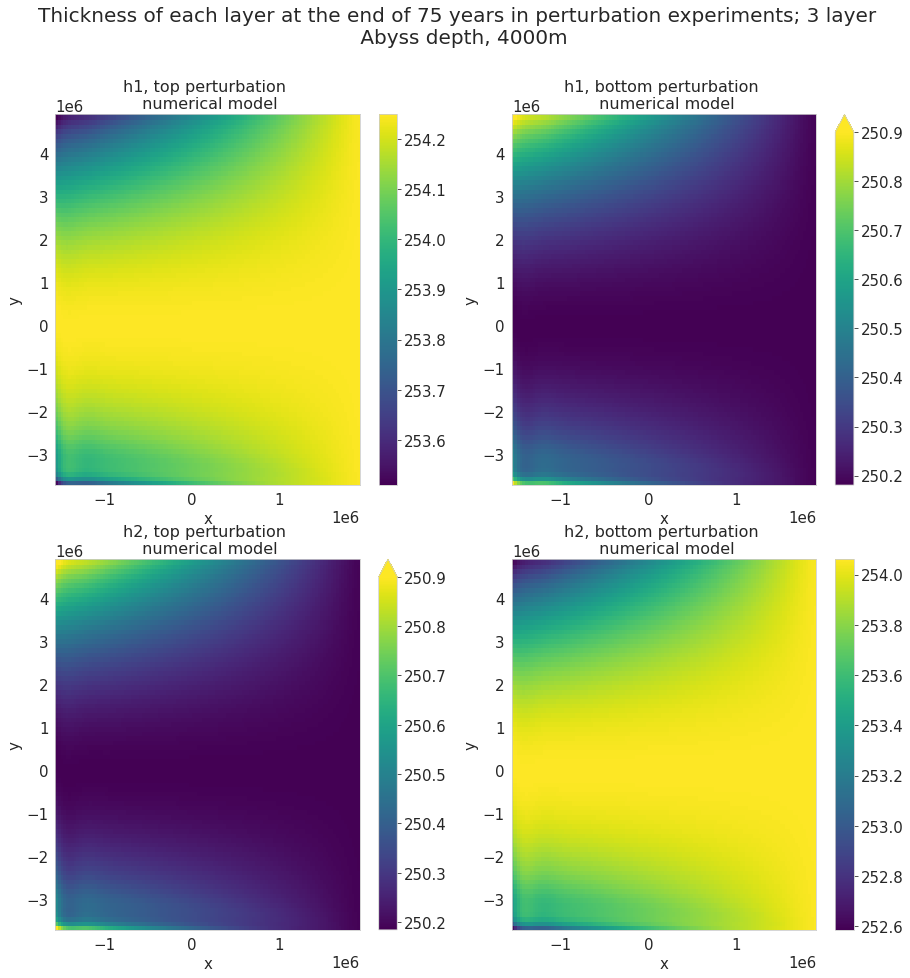

In [9]:
wbc=12
import seaborn as sns
sns.set_style("whitegrid")


plt.rcParams.update({'font.size': 12})
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('legend', fontsize=12)     # fontsize of the legend
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,15))

(h1_xr_top[30:-ny//7,wbc:,np.shape(h1_xr_bottom)[2]-1]).plot(ax=ax1,edgecolor='face')
ax1.set_title('h1, top perturbation \n numerical model')
(h1_xr_bottom[30:-ny//7,wbc:,np.shape(h1_xr_bottom)[2]-1]).plot(ax=ax2,vmax=250.9,edgecolor='face')
ax2.set_title('h1, bottom perturbation \n numerical model')



(h2_xr_top[30:-ny//7,wbc:,np.shape(h1_xr_bottom)[2]-1]).plot(ax=ax3,vmax=250.9,edgecolor='face')
ax3.set_title('h2, top perturbation \n numerical model')
(h2_xr_bottom[30:-ny//7,wbc:,np.shape(h1_xr_bottom)[2]-1]).plot(ax=ax4,edgecolor='face')
ax4.set_title('h2, bottom perturbation \n numerical model')

fig.suptitle('Thickness of each layer at the end of 75 years in perturbation experiments; 3 layer \n Abyss depth, 4000m', fontsize=20)

import matplotlib
mpl.pyplot.savefig('layer_thickness_noprediction_3layer.pdf', dpi=500,bbox_inches='tight',facecolor='white',transparent=False)

In [10]:
#compute the dynamic steric sea level
nh_top_4000=(h1_xr_top+h2_xr_top+h3_xr_top).where(h1_xr_top.y>0).mean('x').mean('y')-(h1_xr_top+h2_xr_top+h3_xr_top).mean('x').mean('y')
nh_bottom_4000=(h1_xr_bottom+h2_xr_bottom+h3_xr_bottom).where(h1_xr_bottom.y>0).mean('x').mean('y')-(h1_xr_bottom+h2_xr_bottom+h3_xr_bottom).mean('x').mean('y')

Text(0.5, 1.0, 'Dynamic sea level, NH')

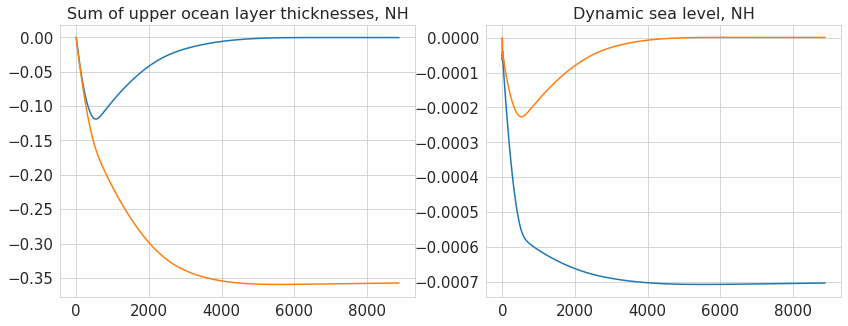

In [11]:
#As with the 2.5 layer model, we show that this result doesn't hold for the dynamic sea level which has an extremely small signal

fig,(ax1,ax2)=plt.subplots(ncols=2,nrows=1,figsize=(14,5))

sum_top=h1_xr_top+h2_xr_top
sum_bottom=h1_xr_bottom+h2_xr_bottom

ax1.plot(sum_top.where(sum_top.y>0).mean('x').mean('y')-sum_top.mean('x').mean('y'))
ax1.plot(sum_bottom.where(sum_top.y>0).mean('x').mean('y')-sum_bottom.mean('x').mean('y'))
ax1.set_title('Sum of upper ocean layer thicknesses, NH')


ax2.plot(nh_top_4000)
ax2.plot(nh_bottom_4000)
ax2.set_title('Dynamic sea level, NH')

# Abyss size 10000m

In [12]:
### TOP PERTURB
#TIMEPERIOD1
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years0to10_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h3_xr_top1=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years0to10_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h2_xr_top1=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years0to10_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h1_xr_top1=(h1.to_array()).squeeze()


#TIMEPERIOD2
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years10to42pt5_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h3_xr_top2=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years10to42pt5_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h2_xr_top2=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years10to42pt5_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h1_xr_top2=(h1.to_array()).squeeze()


#TIMEPERIOD3
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years42pt5to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h3_xr_top3=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years42pt5to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h2_xr_top3=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years42pt5to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h1_xr_top3=(h1.to_array()).squeeze()

### BOTTOM PERTURB
#TIMEPERIOD1
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years0to10_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h3_xr_bottom1=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years0to10_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h2_xr_bottom1=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years0to10_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h1_xr_bottom1=(h1.to_array()).squeeze()


#TIMEPERIOD2
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years10to42pt5_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h3_xr_bottom2=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years10to42pt5_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h2_xr_bottom2=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years10to42pt5_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h1_xr_bottom2=(h1.to_array()).squeeze()


#TIMEPERIOD3
h3=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h3_xr_control_years42pt5to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h3_xr_bottom3=(h3.to_array()).squeeze()
h2=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h2_xr_control_years42pt5to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h2_xr_bottom3=(h2.to_array()).squeeze()
h1=xr.open_dataset("/scratch/abf376/2.5layer_reducedgravitymodel/saved_runs/h1_xr_control_years42pt5to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt125_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_correcteddomainsizetruethreelayer_H310000.nc")
h1_xr_bottom3=(h1.to_array()).squeeze()

In [13]:
#Concatenate
h1_xr_top=xr.concat([h1_xr_top1,h1_xr_top2,h1_xr_top3],dim='time')
h2_xr_top=xr.concat([h2_xr_top1,h2_xr_top2,h2_xr_top3],dim='time')
h3_xr_top=xr.concat([h3_xr_top1,h3_xr_top2,h3_xr_top3],dim='time')

h1_xr_bottom=xr.concat([h1_xr_bottom1,h1_xr_bottom2,h1_xr_bottom3],dim='time')
h2_xr_bottom=xr.concat([h2_xr_bottom1,h2_xr_bottom2,h2_xr_bottom3],dim='time')
h3_xr_bottom=xr.concat([h3_xr_bottom1,h3_xr_bottom2,h3_xr_bottom3],dim='time')

<xarray.DataArray 'time' ()>
array(41.34477077)
Coordinates:
    time      float64 1.488e+04
    variable  <U29 '__xarray_dataarray_variable__'


Text(0.5, 1.0, '3 layer model \n Change in NH anomaly of upper ocean thickness \n Abyss depth, 10000m')

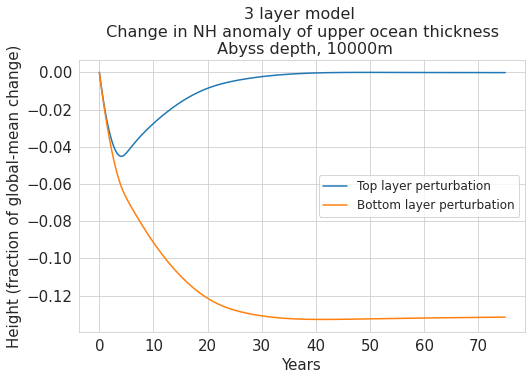

In [14]:
fig,(ax2)=plt.subplots(nrows=1,ncols=1,figsize=(8,5))

last=ny-ny//7

asymp_top=(h1_xr_top+h2_xr_top)


asymp_bottom=(h1_xr_bottom+h2_xr_bottom)

index=((100*(asymp_bottom[30:int(last),:,:].where(asymp_bottom.y>0).mean('x').mean('y')-asymp_bottom.mean('x').mean('y')))).argmin()
print(asymp_bottom.time[index]/360)
scale_factor=(asymp_bottom.mean('x').mean('y')[index]-asymp_bottom.mean('x').mean('y')[0])


ax2.plot(asymp_bottom.time/360,(100*(asymp_top[30:int(last),:,:].where(asymp_top.y>0).mean('x').mean('y')-asymp_top.mean('x').mean('y')))/(100*scale_factor),label='Top layer perturbation')
ax2.plot(asymp_bottom.time/360,(100*(asymp_bottom[30:int(last),:,:].where(asymp_bottom.y>0).mean('x').mean('y')-asymp_bottom.mean('x').mean('y')))/(100*scale_factor),label='Bottom layer perturbation')

ax2.set_ylabel('Height (fraction of global-mean change)')
ax2.set_xlabel('Years')
ax2.legend()
ax2.set_title('3 layer model \n Change in NH anomaly of upper ocean thickness \n Abyss depth, 10000m')